# Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Inserting Libraries that do not exist in Colab

In [ ]:
!pip install --upgrade tensorflow-gpu==2.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.1.0 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.1.0


In [ ]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 122352 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.4.0-2ubuntu1.2_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libarchive-dev:amd64 (3.4.0-2ubuntu1.2) ...
Processing triggers for man-db (2.9.1-1) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.3 MB/s eta 0:00:00
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31644 sha256=4a8b5771f448b79c04b7d5cb0a1a8f19e5ac7aaf65408539d028b98c85252d89
  Stored in directory: /root/.cache/pip/wheels/c9/a5/cc/cb20f1314d4cdec0001fd72baa1efe93e1542a81bdea2fc639
Successfully built libarchive


In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install cartopy
import cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 74.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 60.6 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp39-cp39-linux_x86_64.whl size=11113649 sha256=3ed1f8db68f252b056c6d5f8c7418238d8c8b86c56bf3728faf5e96bd1614178
  Stored in directory: /root/.cache/pip/wheels/74/b9/f5/2c94acd7cd21480e6cf63169144d7aac3e8d9cf638225ed578
Successfully built cartopy


# Importing Libraries

In [ ]:
import pandas as pd
import tensorflow as tf
import nltk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import re
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [ ]:
# load the data
df_train = pd.read_csv("drive/My Drive/Colab Notebooks/train.csv")
df_test = pd.read_csv("drive/My Drive/Colab Notebooks/test.csv")

In [ ]:
df_train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
df_test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [ ]:
# dataframe information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18285 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      18285 non-null  int64 
 1   title   18285 non-null  object
 2   author  18285 non-null  object
 3   text    18285 non-null  object
 4   label   18285 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.3+ MB


In [ ]:
# dataframe information
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4575 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      4575 non-null   int64 
 1   title   4575 non-null   object
 2   author  4575 non-null   object
 3   text    4575 non-null   object
dtypes: int64(1), object(3)
memory usage: 178.7+ KB


In [ ]:
# Dropping the Nan Values
df_train=df_train.dropna()


In [ ]:
# Getting the Independent Features

X=df_train.drop('label',axis=1)


In [ ]:
# Getting the Dependent features
y=df_train['label']

In [ ]:
X.shape

(18285, 4)

In [ ]:
y.shape

(18285,)

In [ ]:
# Vocabulary size
voc_size=5000

# OneHot Representation

In [ ]:
messages=X.copy()

In [ ]:
messages['title'][1]

'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'

In [ ]:
messages.reset_index(inplace=True)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

Streaming output truncated to the last 5000 lines.
13285
13286
13287
13288
13289
13290
13291
13292
13293
13294
13295
13296
13297
13298
13299
13300
13301
13302
13303
13304
13305
13306
13307
13308
13309
13310
13311
13312
13313
13314
13315
13316
13317
13318
13319
13320
13321
13322
13323
13324
13325
13326
13327
13328
13329
13330
13331
13332
13333
13334
13335
13336
13337
13338
13339
13340
13341
13342
13343
13344
13345
13346
13347
13348
13349
13350
13351
13352
13353
13354
13355
13356
13357
13358
13359
13360
13361
13362
13363
13364
13365
13366
13367
13368
13369
13370
13371
13372
13373
13374
13375
13376
13377
13378
13379
13380
13381
13382
13383
13384
13385
13386
13387
13388
13389
13390
13391
13392
13393
13394
13395
13396
13397
13398
13399
13400
13401
13402
13403
13404
13405
13406
13407
13408
13409
13410
13411
13412
13413
13414
13415
13416
13417
13418
13419
13420
13421
13422
13423
13424
13425
13426
13427
13428
13429
13430
13431
13432
13433
13434
13435
13436
13437
13438
13439
13440
13441
13442
1

In [ ]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [ ]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[1986, 2704, 1917, 2796, 4785, 4094, 2519, 180, 4607, 1457],
 [604, 2478, 3377, 709, 1324, 2660, 619],
 [379, 4162, 2398, 749],
 [4556, 3936, 3841, 447, 4961, 702],
 [2902, 1324, 928, 2866, 1271, 2016, 1324, 449, 4883, 2899],
 [2770,
  240,
  1961,
  76,
  4754,
  4430,
  1422,
  4843,
  4455,
  2479,
  1691,
  1398,
  2911,
  4065,
  619],
 [1761, 1076, 4281, 3799, 565, 4895, 4156, 960, 4075, 3543, 444],
 [1029, 98, 2198, 1430, 2572, 923, 4430, 942, 4075, 3543, 444],
 [1964, 4817, 2714, 3044, 4253, 4614, 4709, 1494, 4430, 99],
 [554, 82, 1328, 2680, 3222, 2268, 214, 4454],
 [4262, 4238, 3814, 1203, 1479, 3107, 2438, 3993, 2259, 4551, 4046],
 [447, 432, 4785, 4614, 4430, 2572],
 [1026, 4772, 1535, 1729, 4337, 965, 3338, 1071, 2836],
 [4470, 3332, 292, 4938, 4784, 3895, 2262, 4075, 3543, 444],
 [2538, 3036, 2827, 3894, 3675, 4075, 3543, 444],
 [703, 4569, 1998, 3271, 4423, 2142, 1278, 810, 2067, 4037],
 [624, 2261, 2478],
 [2104, 4756, 4459, 1038, 4430, 1405, 3567, 619],
 [2936, 1393, 

# Embedding Representation

In [ ]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ...  180 4607 1457]
 [   0    0    0 ... 1324 2660  619]
 [   0    0    0 ... 4162 2398  749]
 ...
 [   0    0    0 ... 4075 3543  444]
 [   0    0    0 ... 1481  393 3182]
 [   0    0    0 ... 1271  826 2158]]


In [ ]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 1986,
       2704, 1917, 2796, 4785, 4094, 2519,  180, 4607, 1457], dtype=int32)

In [ ]:
## Creating model with Embedded Layers
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
len(embedded_docs),y.shape

(18285, (18285,))

In [ ]:
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [ ]:
X_final.shape,y_final.shape

((18285, 20), (18285,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

# Model Training

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
192/192 [==============================] - 14s 58ms/step - loss: 0.3450 - accuracy: 0.8362 - val_loss: 0.1959 - val_accuracy: 0.9155
Epoch 2/10
192/192 [==============================] - 9s 45ms/step - loss: 0.1394 - accuracy: 0.9448 - val_loss: 0.1961 - val_accuracy: 0.9196
Epoch 3/10
192/192 [==============================] - 9s 48ms/step - loss: 0.0998 - accuracy: 0.9625 - val_loss: 0.2114 - val_accuracy: 0.9205
Epoch 4/10
192/192 [==============================] - 11s 57ms/step - loss: 0.0735 - accuracy: 0.9747 - val_loss: 0.2574 - val_accuracy: 0.9157
Epoch 5/10
192/192 [==============================] - 8s 42ms/step - loss: 0.0518 - accuracy: 0.9832 - val_loss: 0.2971 - val_accuracy: 0.9102
Epoch 6/10
192/192 [==============================] - 10s 52ms/step - loss: 0.0361 - accuracy: 0.9880 - val_loss: 0.3446 - val_accuracy: 0.9137
Epoch 7/10
192/192 [==============================] - 11s 58ms/step - loss: 0.0237 - accuracy: 0.9925 - val_loss: 0.4202 - val_accuracy: 0.

# Addition of Dropout

In [ ]:
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Performance Metrics and Confusion Matrix

In [ ]:
y_pred=model.predict(X_test)

189/189 [==============================] - 4s 18ms/step


In [ ]:
print(classification_report(y_test, (y_pred>0.5))) #target_names=target_names))

              precision    recall  f1-score   support

           0       0.56      0.48      0.51      3419
           1       0.43      0.51      0.46      2616

    accuracy                           0.49      6035
   macro avg       0.49      0.49      0.49      6035
weighted avg       0.50      0.49      0.49      6035



In [ ]:
cm = confusion_matrix(y_test,(y_pred>0.5))

<Figure size 1000x1000 with 0 Axes>

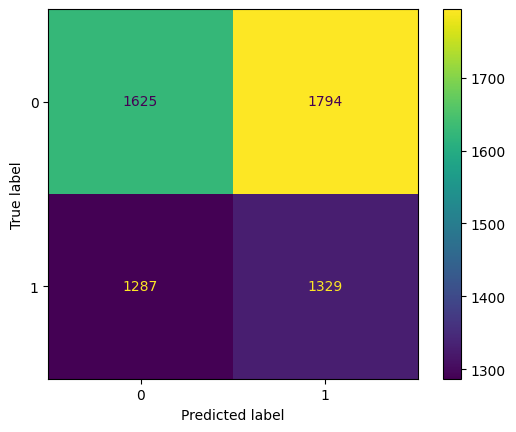

In [ ]:
plt.figure(figsize = (10, 10))
cm_display = ConfusionMatrixDisplay(cm).plot() 
#sns.heatmap(confusion_matrix, annot = True)